Annual High: 115.48251205654991
Annual Low: 14.025966834790715

Quarterly Highs:
Date
2023-03-31 00:00:00-04:00     27.822790
2023-06-30 00:00:00-04:00     43.976836
2023-09-30 00:00:00-04:00     50.250956
2023-12-31 00:00:00-05:00     50.537033
2024-03-31 00:00:00-04:00     97.392004
2024-06-30 00:00:00-04:00    115.482512
Freq: Q-DEC, Name: High, dtype: float64

Quarterly Lows:
Date
2023-03-31 00:00:00-04:00    14.025967
2023-06-30 00:00:00-04:00    26.209439
2023-09-30 00:00:00-04:00    40.298935
2023-12-31 00:00:00-05:00    39.221489
2024-03-31 00:00:00-04:00    47.313894
2024-06-30 00:00:00-04:00    75.599795
Freq: Q-DEC, Name: Low, dtype: float64

Seasonal Highs:
Date
2023-01-31 00:00:00-05:00     20.616192
2023-05-31 00:00:00-04:00     41.921109
2023-09-30 00:00:00-04:00     50.250956
2024-01-31 00:00:00-05:00     63.484805
2024-05-31 00:00:00-04:00    115.482512
Freq: 4M, Name: High, dtype: float64

Seasonal Lows:
Date
2023-01-31 00:00:00-05:00    14.025967
2023-05-31 00:00:00-

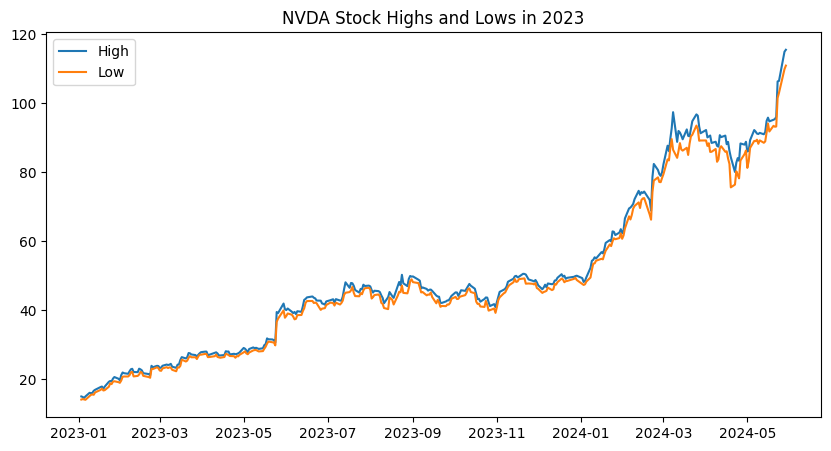

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def fetch_and_process_data(symbol, start_date, end_date):
    stock = yf.Ticker(symbol)
    data = stock.history(start=start_date, end=end_date)
    return data

def calculate_extremes(data):
    return data['High'].max(), data['Low'].min()

def plot_extremes(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data['High'], label='High')
    plt.plot(data['Low'], label='Low')
    plt.title(title)
    plt.legend()
    plt.show()

# 데이터 불러오기
symbol = "NVDA"  # 예시로 테슬라를 사용
data_2023 = fetch_and_process_data(symbol, '2023-01-01', '2024-05-30')

# 연초 연말 데이터 추출 및 분기별, 계절별 데이터 처리
annual_high, annual_low = calculate_extremes(data_2023)
quarterly_highs = data_2023.resample('Q').max()['High']
quarterly_lows = data_2023.resample('Q').min()['Low']
seasonal_highs = data_2023.resample('4M').max()['High']  # 계절별
seasonal_lows = data_2023.resample('4M').min()['Low']  # 계절별

# 결과 출력
print("Annual High:", annual_high)
print("Annual Low:", annual_low)
print("\nQuarterly Highs:")
print(quarterly_highs)
print("\nQuarterly Lows:")
print(quarterly_lows)
print("\nSeasonal Highs:")
print(seasonal_highs)
print("\nSeasonal Lows:")
print(seasonal_lows)

# 그래프 출력
plot_extremes(data_2023, f"{symbol} Stock Highs and Lows in 2023")
